<a href="https://colab.research.google.com/github/harisdesai/ML/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("weather_classification_data.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (13200, 11)
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        R

In [ ]:
target_col = "Weather Type"
y = df[target_col]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X = pd.get_dummies(df.drop(columns=[target_col]), drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

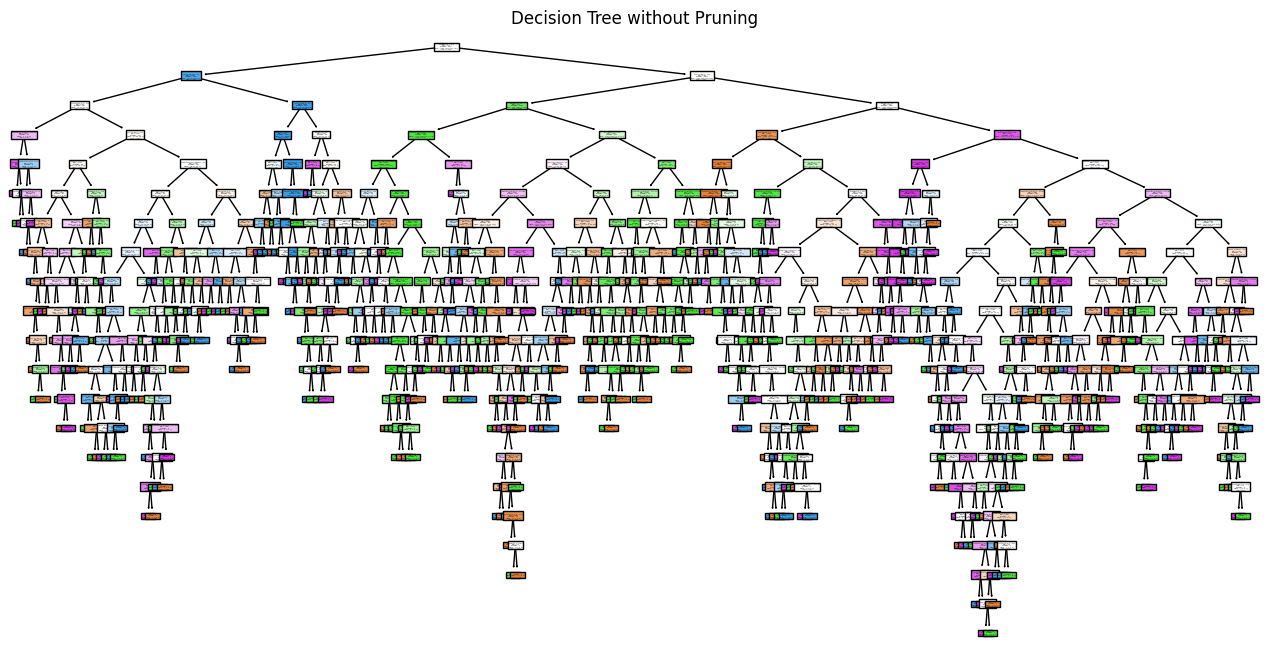

In [ ]:
clf_no_pruning = DecisionTreeClassifier(random_state=42)
clf_no_pruning.fit(X_train, y_train)
plt.figure(figsize=(16,8))
plot_tree(clf_no_pruning, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree without Pruning")
plt.show()

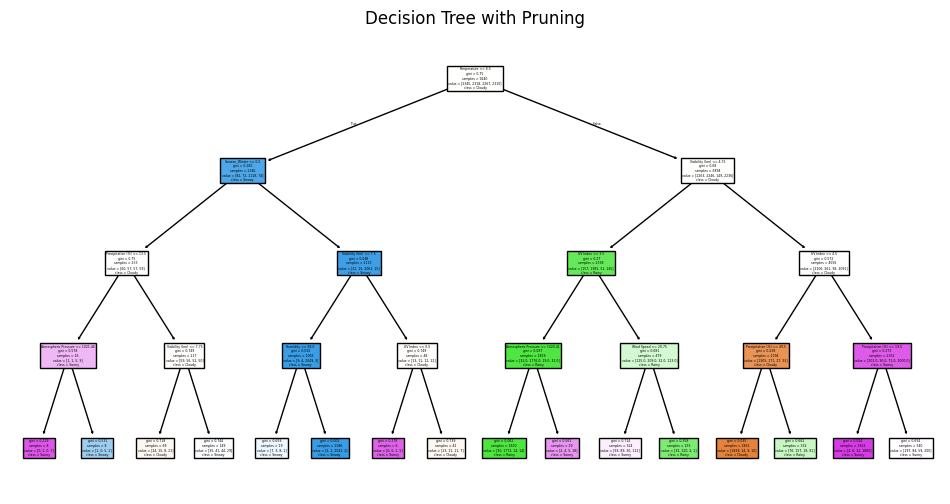

In [ ]:
clf_pruning = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
clf_pruning.fit(X_train, y_train)
plt.figure(figsize=(12,6))
plot_tree(clf_pruning, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree with Pruning")
plt.show()

In [ ]:
y_pred_no_pruning = clf_no_pruning.predict(X_test)
y_pred_pruning = clf_pruning.predict(X_test)

print("Accuracy without Pruning:", accuracy_score(y_test, y_pred_no_pruning))
print("Accuracy with Pruning:", accuracy_score(y_test, y_pred_pruning))

Accuracy without Pruning: 0.9025252525252525
Accuracy with Pruning: 0.8755050505050505


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf_pruning.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(feature_importance)


Feature Importances:
                      Feature  Importance
15         Weather Type_Snowy    0.481939
6             Visibility (km)    0.247453
16         Weather Type_Sunny    0.135970
3           Precipitation (%)    0.056425
5                    UV Index    0.030183
4        Atmospheric Pressure    0.026931
2                  Wind Speed    0.018000
8        Cloud Cover_overcast    0.003099
0                 Temperature    0.000000
7          Cloud Cover_cloudy    0.000000
1                    Humidity    0.000000
9   Cloud Cover_partly cloudy    0.000000
10              Season_Spring    0.000000
12              Season_Winter    0.000000
11              Season_Summer    0.000000
14          Location_mountain    0.000000
13            Location_inland    0.000000
